In [1]:
# Test

In [240]:
%matplotlib inline
import pandas as pd
from pandas.tseries.offsets import *

import pylab as pl
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt

import time
import random

import csv
import requests
import dateutil as du
import dateutil.parser
from dateutil.parser import parse
from datetime import datetime

import matplotlib as mpl
import matplotlib.colors
from matplotlib import pyplot as plt
from matplotlib import collections, transforms
from matplotlib.colors import colorConverter

mpl.rcParams['text.usetex'] = False
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}' , r'\usepackage[T1]{fontenc}'] 
mpl.rcParams['text.latex.unicode'] = True 

In [130]:
class Profiler(object):     

    def __enter__(self):
        self._startTime = time.time()
    
    def __exit__(self, type, value, traceback):
        print "Elapsed time: {:.3f} sec".format(time.time() - self._startTime)

In [141]:
def pastel(colour, weight=2.4):
    """ Convert colour into a nice pastel shade"""
    rgb = np.asarray(colorConverter.to_rgba(colour))
    # scale colour
    maxc = max(rgb)
    if 0 < maxc and maxc < 1.0:
        # scale colour
        rgb = rgb / maxc
    # now decrease saturation
    total = rgb.sum()
    slack = 0
    for x in rgb:
        slack += 1.0 - x

    # want to increase weight from total to weight
    # pick x s.t.  slack * x == weight - total
    # x = (weight - total) / slack
    x = (weight - total) / slack

    rgb = [c + (x * (1.0 - c)) for c in rgb] 

    return rgb

def get_colours(n, flag):
    """ Return n pastel colours. """
    base = np.asarray([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

    if n <= 3:
        return base[0:n]

    # how many new colours to we need to insert between
    # red and green and between green and blue?
    needed = (((n - 3) + 1) / 2, (n - 3) / 2)

    colours = []
    for start in (0, 1):
        for x in np.linspace(0, 1, needed[start] + 2):
            colours.append((base[start] * (1.0 - x)) +
                           (base[start + 1] * x))
    
    if (flag ==0):
        return [c for c in colours[0:n]] 
    else:
        return [pastel(c) for c in colours[0:n]]

In [32]:
t = np.arange(0.0, 1.05, 0.05)
s = np.cos(4 * np.pi * t) * np.sin(np.pi*t/4) + 2

#plt.rc('text', usetex=False)
#plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'],'size':16})

In [33]:
plt.rc('text', usetex=False)

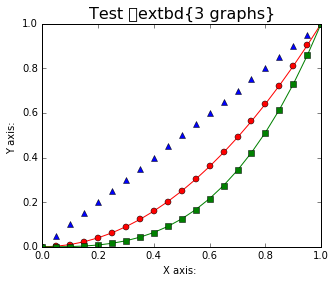

In [125]:
t = np.arange(0.0, 1.05, 0.05)
s=t
s2 = t*t
s3 = t*t*t

f, ax = plt.subplots(figsize=(5,4))

plt.xlabel("X axis: ")
plt.ylabel("Y axis: ")
plt.title("Test \textbd{3 graphs}", fontsize=16)

plt.plot(t, s,'b^')
plt.plot(t,s2,'r-',  t,s2,'ro')
plt.plot(t,s3,'g-',  t,s3,'gs')

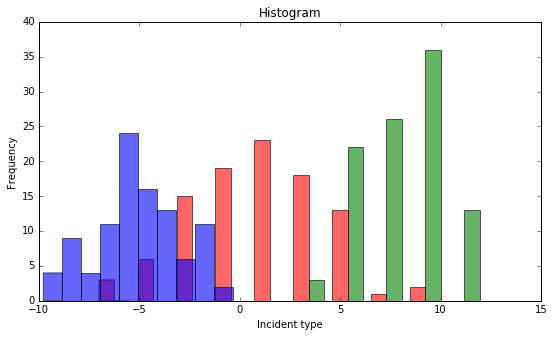

In [140]:
# HISTOGRAM
num_datapoints = 100
dataset1 = [random.gauss(1, 3)  for i in range(0, num_datapoints)]  # list
dataset2 = [random.gauss(8, 2)  for i in range(0, num_datapoints)]
dataset3 = [random.gauss(-5, 2) for i in range(0, num_datapoints)]  # mu,std

fig = plt.figure(figsize=(9,5)) # fig,ax = plt.subplots(figsize=(10,9))
ax = fig.add_subplot(1,1,1) # one row, one column, first plot

ax.hist((dataset1, dataset2), bins=10, color=("red", "green"), alpha=0.6)
ax.hist(dataset3,             bins=10, color="blue",           alpha=0.6)

ax.set_title("Histogram")
ax.set_xlabel("Incident type")
ax.set_ylabel("Frequency")

fig.savefig("histogram.png")

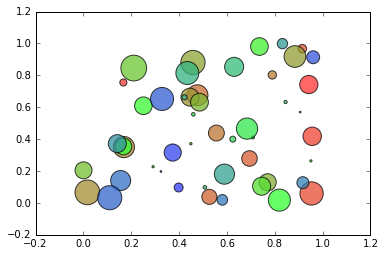

In [142]:
n_points = 50
xx     = np.random.rand(n_points)
yy     = np.random.rand(n_points)

c1 = np.random.rand(n_points) 
c2 = np.random.rand(n_points) 
c3 = np.random.rand(n_points) 

colors        = get_colours(n_points,0)  # 50 common colors, value in [0, 1]
colors_pastel = get_colours(n_points,1)  # 50 pastel colors, rgb color like [r,g,b]

area = np.pi * (15 * np.random.rand(n_points))**2  # 50 radiuses for each point

plt.scatter(xx, yy, s=area, c=colors_pastel, alpha=0.75, label=colors)
plt.show()

In [135]:
url_sf     = "https://raw.githubusercontent.com/uwescience/datasci_course_materials/master/assignment6/sanfrancisco_incidents_summer_2014.csv"
url_seatle = "https://raw.githubusercontent.com/uwescience/datasci_course_materials/master/assignment6/seattle_incidents_summer_2014.csv"
csv_sf = "sanfrancisco_incidents_summer_2014.csv"
csv_seatle = "seattle_incidents_summer_2014.csv"

# local file reading is approximately 40 times faster than from the internet URL
with Profiler():
    sf = pd.read_table(url_sf, sep=',', quotechar='\"', parse_dates=False, low_memory=False) #, index_col='PdId')  # or | read_scv 
    #seatle = pd.read_table(data_seatle, sep=',', quotechar='\"', parse_dates=False, low_memory=False)  # read_scv 

Elapsed time: 8.358 sec


In [39]:
n_sf     = len(sf['Category'])            # 28993   type: numpy.int64
#n_seatle = len(seatle['Offense Type'])    # 32779   type: numpy.int64

# Add column 'one' = 1 for different counting on groups later
sf['one']     = pd.Series(np.ones(n_sf,      dtype=np.int64), index=sf.index)
#seatle['one'] = pd.Series(np.ones(n_seatle , dtype=np.int64), index=seatle.index)

In [137]:
#------------------ San Francisco ---------------------------------------------------
# Add column 'datetime' (date only without hh:mm:ss) and columns 'Year','Month','Day'. 
# This columns will be used for analysis and visuaisation by diffeerent periods.
n = n_sf

with Profiler():
    c_dt    = pd.Series(np.empty(n, dtype=np.int64), index=sf.index)
    c_year  = pd.Series(np.empty(n, dtype=np.int64), index=sf.index)  # column: index,value
    c_month = pd.Series(np.empty(n, dtype=np.int64), index=sf.index)  # type: pandas.core.series.Series
    c_day   = pd.Series(np.empty(n, dtype=np.int64), index=sf.index)
    c_hour  = pd.Series(np.empty(n, dtype=np.int64), index=sf.index)
    #c_minute= pd.Series(np.zeros(n, dtype=np.int64), index=sf.index)  # do not need

    i = 0
    for dt_str in zip(sf['Date'],sf['Time']):
    
        dt_full_str = dt_str[0] + ' ' + dt_str[1]   # ('2014-08-31', '23:50:00')
        dt          = parse(dt_full_str)            # from string to datetime
        #print "%2d %4d %2d %2d    %2d %2d %2d %s" % \
        #i,dt.year,dt.month,dt.day,dt.hour,dt.minute, dt.second, type(dt.year))# all - int 
        c_year[i]  = dt.year
        c_month[i] = dt.month
        c_day[i]   = dt.day
        c_hour[i]  = dt.hour
        c_dt[i]    = parse(dt_str[0])  # date only in datetime, no hh:mm:ss
        #c_minute[i]= dt.minute
        i += 1

    sf['Year']  = c_year
    sf['Month'] = c_month
    sf['Day']   = c_day
    sf['Hour']  = c_hour
    sf['datetime'] = c_dt

for i in [0,15000,28000]:
    print sf['Year'][i],sf['Month'][i],sf['Day'][i],sf['Hour'][i],sf['datetime'][i]

Elapsed time: 7.813 sec
2014 8 31 23 2014-08-31 00:00:00
2014 7 17 2 2014-07-17 00:00:00
2014 6 4 12 2014-06-04 00:00:00


In [112]:
NN = 1000
df = sf[0:NN+1]
#df[['Category','Hour','datetime']][-10:-1]
#df[-10:-1]

In [139]:

NN = n_sf # 1000

day_night = pd.Series([u'Day',u'Night'], dtype=np.dtype((str, 6)), index=[False,True])
TF =        pd.Series([False,True],      dtype=np.bool,            index=[False,True])
#day_night, TF

# filter data by most criminal categories and night hours

with Profiler() as p: 
    
    mask_night        = np.empty(NN, dtype=bool)
    
    i = 0
    for hour in sf['Hour']:
        b = (hour <= 1) | (hour >= 18)
        mask_night[i]        = b
        i += 1
        #print i,'\t',mask_night[i],'\t',field
        #if i >= NN:
        #    break

    sf['hour_period'] = pd.Series(np.empty(NN, dtype=np.dtype((str, 6))),index=range(NN) )    
    sf['hour_period'][mask_night]   = day_night[True] 
    sf['hour_period'][~mask_night]  = day_night[False] 

    mask_categ        = sf['Category'].isin(['LARCENY/THEFT','ASSAULT']) # 'OTHER OFFENSES','NON-CRIMINAL',

# compare with non-vectorized  code:
'''
with Profiler() as p: 
    
    mask_night        = np.empty(NN, dtype=bool)
    i = 0
    for field in sf['Hour']:
        if  (field <= 1) & (field >= 18):  
            mask_night[i]        = True    # night
            sf['hour_period'][i] = u"Night"
        else:
            mask_night[i]        = False  # day
            sf['hour_period'][i] = u"Day"
        #print sf['Hour'][i],'\t', mask_night[i], '\t', mask_categ[i], '\t', sf['Category'][i]       
        i += 1
        #if i > 50:
        #    break
'''        
#  Elapsed time:    0.344 sec   - VECTORIZED CODE, difference: 2747/0.344 = 7985 times (!!!)
#  Elapsed time: 2747.336 sec   - 45 min 47 sec (!!!)
        

D:\Anaconda\Lib\site-packages\IPython\kernel\__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda\Lib\site-packages\IPython\kernel\__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Elapsed time: 0.344 sec
Elapsed time: 2747.336 sec


D:\Anaconda\Lib\site-packages\IPython\kernel\__main__.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [114]:
print mask_night[990:1000]
print len(sf[mask_night & mask_categ][['Hour','Category','hour_period']])
print '\n',sf[['Hour','Category','hour_period']][990:1000]
print '\n',sf[['Hour','Category','hour_period']][150:160]
#print sf[mask_night & mask_categ][['Hour','Category','hour_period']]

[False False False False False False  True  True  True  True]
5612

     Hour        Category hour_period
990     2         ASSAULT         Day
991     2    NON-CRIMINAL         Day
992     2    NON-CRIMINAL         Day
993     2         ASSAULT         Day
994     2   LARCENY/THEFT         Day
995     2           FRAUD         Day
996     1  OTHER OFFENSES       Night
997     1         ROBBERY       Night
998     1    NON-CRIMINAL       Night
999     1  OTHER OFFENSES       Night

     Hour        Category hour_period
150    16  MISSING PERSON         Day
151    16  MISSING PERSON         Day
152    16  MISSING PERSON         Day
153    16   LARCENY/THEFT         Day
154    16   LARCENY/THEFT         Day
155    16    NON-CRIMINAL         Day
156    15    NON-CRIMINAL         Day
157    15   LARCENY/THEFT         Day
158    15   VEHICLE THEFT         Day
159    15  OTHER OFFENSES         Day


## Crime analysis 

In [110]:
# select night incidents for the most Top 3 incident categories
sf_crimes = sf[mask_night & mask_categ][['Hour','Category','hour_period',
                                         'Month','Date','datetime','one']] #.sort('Month')
#sf_crimes

In [ ]:
#print sf.groupby('hour_categ')['hour_categ'].count()
#sf.groupby('Hour')['Category'].size().order()[-11:-1] #value_counts() # Series

In [ ]:
NN
c1 = np.random.rand(NN) 

In [127]:
print datetime.now()

2015-12-04 23:36:27.571000


In [192]:
#pd.data_range()
sf[0:4]

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Year,Month,Day,Hour,datetime,hour_period,one
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031,2014,8,31,23,2014-08-31 00:00:00,Day,1
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000,2014,8,31,23,2014-08-31 00:00:00,Day,1
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244,2014,8,31,23,2014-08-31 00:00:00,Day,1
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244,2014,8,31,23,2014-08-31 00:00:00,Day,1


In [174]:
ts = sf.datetime.copy()

ts.index.resample('D') #, how='mean')
#resample('D', how='mean')

AttributeError: 'Int64Index' object has no attribute 'resample'

In [218]:
dates = [pd.Timestamp('2014-08-31'), pd.Timestamp('2014-07-01'), pd.Timestamp('2014-06-01')] #, Timestamp('2012-05-03')]
ts = pd.Series(sf.one, dates)
ts.index

DatetimeIndex(['2014-08-31', '2014-07-01', '2014-06-01'], dtype='datetime64[ns]', freq=None, tz=None)

In [208]:
dates

[Timestamp('2014-08-31 00:00:00'), Timestamp('2014-06-01 00:00:00')]

In [209]:
unit = pd.Series(np.ones(n_sf, dtype=float), index = sf.index)
#ts = pd.Series(sf.one, dates)
type(sf['one'].index)



pandas.core.index.Int64Index

In [214]:
type(sf.Date.index)

pandas.core.index.Int64Index

In [222]:
index = pd.date_range('2014-06-01', periods=14, freq='W')  # 14 weeks to Aug 31.
index


DatetimeIndex(['2014-06-01', '2014-06-08', '2014-06-15', '2014-06-22',
               '2014-06-29', '2014-07-06', '2014-07-13', '2014-07-20',
               '2014-07-27', '2014-08-03', '2014-08-10', '2014-08-17',
               '2014-08-24', '2014-08-31'],
              dtype='datetime64[ns]', freq='W-SUN', tz=None)

In [227]:
rng = pd.date_range('2014-06-01', '2014-08-31') #, periods=92, freq='D')
rng

DatetimeIndex(['2014-06-01', '2014-06-02', '2014-06-03', '2014-06-04',
               '2014-06-05', '2014-06-06', '2014-06-07', '2014-06-08',
               '2014-06-09', '2014-06-10', '2014-06-11', '2014-06-12',
               '2014-06-13', '2014-06-14', '2014-06-15', '2014-06-16',
               '2014-06-17', '2014-06-18', '2014-06-19', '2014-06-20',
               '2014-06-21', '2014-06-22', '2014-06-23', '2014-06-24',
               '2014-06-25', '2014-06-26', '2014-06-27', '2014-06-28',
               '2014-06-29', '2014-06-30', '2014-07-01', '2014-07-02',
               '2014-07-03', '2014-07-04', '2014-07-05', '2014-07-06',
               '2014-07-07', '2014-07-08', '2014-07-09', '2014-07-10',
               '2014-07-11', '2014-07-12', '2014-07-13', '2014-07-14',
               '2014-07-15', '2014-07-16', '2014-07-17', '2014-07-18',
               '2014-07-19', '2014-07-20', '2014-07-21', '2014-07-22',
               '2014-07-23', '2014-07-24', '2014-07-25', '2014-07-26',
      

In [242]:
d = datetime(2013, 6, 1, 0, 0)
#newd = pd.relativedelta(months=12,days=0) - d # datautil.relativedelta(months=14)
newd

AttributeError: 'module' object has no attribute 'relativedelta'